# Evaluate Exercises  

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from pydataset import data
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error

## Evaluating simple linear regressions on lemonade data with other features:

In [264]:
df_lemonade = pd.read_csv('lemonade.csv')

In [265]:
df_lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


### 1.
Make a baseline for predicting sales. (The mean is a good baseline)

In [266]:
df_lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


### 2.
Create a new dataframe to hold residuals.

In [276]:
x = df_lemonade.Temperature
y = df_lemonade.Sales

residuals = pd.DataFrame({'x': x,
                          'y': y
                         })
residuals['baseline_yhat'] = df_lemonade.Sales.mean()

### 3.
Calculate the baseline residuals.

In [277]:
residuals['baseline_residual'] = residuals.baseline_yhat - residuals.y

### 4.
Use `ols` from `statsmodels` to create a simple linear regression (1 independent variable, 1 dependent variable) to _predict sales using flyers_.

In [278]:
df_lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [279]:
ols_model = ols('Sales ~ Temperature', data=df_lemonade).fit()

### 1.
Use the `.predict` method from ols to produce all of our predictions. Add these predictions to the data.

In [280]:
residuals['model_yhat'] = ols_model.predict(df_lemonade.Temperature)

### 2. 
Calculate that model's residuals.

In [282]:
residuals['ols_model_residuals'] = residuals.model_yhat - residuals.y

In [283]:
residuals.head()

,x,y,baseline_yhat,baseline_residual,model_yhat,ols_model_residuals
0,27.0,10,25.323288,15.323288,11.112301,1.112301
1,28.9,13,25.323288,12.323288,11.912772,-1.087228
2,34.5,15,25.323288,10.323288,14.272055,-0.727945
3,44.1,17,25.323288,8.323288,18.316540,1.316540
4,42.4,18,25.323288,7.323288,17.600329,-0.399671


### 3.
Evaluate that model's performance and answer if the model is significant.

In [284]:
r2 = ols_model.rsquared
print(f"R-squared of OLS Model 1 is: {r2:.2%}")

R-squared of OLS Model 1 is: 97.98%


### 4.
Evaluate that model's performance and answer if the feature is significant.

`Updated with clarification from Maggie! :)` 

<div class='alert alert-box alert-info'>
<strong>Evaluation Metric: Sum of Squared Errors</strong>

<br>

$\huge \hat{y}_i = mx_i+b_0$
   
<br>

$\huge SSE = \sum \limits_{i=1}^n (\hat{y}_i  - y_i)^2$      
---
<br>    
Where:
    
$\large x_i$ = $x$ is the attribute/predictor. $i$ is the value of that predictor at a row/observation
    
$\large \hat{y}_i$ = Prediction from our model
    
$\large y_i$ = Actual Outcome
    
---    
$SSE$ is very intuitive.

Everytime our model makes a prediction, there are three outcomes:
1. `Too high` where y < $\hat{y}$, 
2. `Too low` where y > $\hat{y}$
3. `Exact` where y == $\hat{y}$

---  
    
The __further away__ a prediction($\hat{y}$) is from the actual value($y$), it is
penalized __more__ than observations that are _slightly_ off from the actual value.


The magnitude of penalization is evident e.g.
                   
                         
Where:

$\hat{y}_1$ = 45

$\hat{y}_2$ = 100

$y$ = 50

Evaluate the expressions:
        
_Small deviation, Small penalization_
    
$SSE_1 = (\hat{y}_1 - y)^2$
    
$(45 - 50)^2  = (-5)^2$

$(-5)^2 = 25$

$SSE_1 = 25$
<br>
<br>
_Large deviation, Large penalization_

$SSE_2 = (\hat{y}_2 - y)^2$    
    
$(100 - 50)^2 = (50)^2$
                         
$(50)^2 = 2500$

$SSE_2 = 2500$                         

                         
</div>

In [83]:
baseline_sse = (residuals.baseline_residual**2).sum()
model_sse = (residuals.ols_model_residuals**2).sum()

<div class='alert alert-box alert-info'><strong>Reminder</strong>:
If the Sum Squared Errors of our model is <strong> less </strong> than the baseline model, we can evaluate our model further. </div>

In [84]:
# If this variable is GREATER than 1, our model beats the baseline
# If this variable is LESS than 1, the baseline model is better. Back to the drawing board.
# If this variable is == 1, the baseline and ols model perform the same. What are the odds?
evaluation = baseline_sse/model_sse

# I'm do not know if the multiple assigned to `evaluation` 
# has any significance in evaluating models beyond what was mentioned above ^. 

if evaluation > 1:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    print(f"Multiple below the baseline: {baseline_sse/model_sse:.2f}")  # Any significance?
    print("Let's evaluate the model with a few more tests.")
else:
    print("Return back to the workbench. This model does not outperform the baseline. \
          Remember, ask yourself if it's even worth it to build a model for your business \
          problems.")

Our model beats the baseline!
SSE: 349.98 < 17297.85
Multiple below the baseline: 49.43
Let's evaluate the model with a few more tests.


In [85]:
if model_sse < baseline_sse:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    print(f"{baseline_sse/model_sse:.2f}")
    print("Let's evaluate the model with a few more tests.")
else:
    print("Return back to the workbench. This model does not outperform the baseline. \
          Remember, ask yourself if it's even worth it to build a model for your business problems.")

Our model beats the baseline!
SSE: 349.98 < 17297.85
49.43
Let's evaluate the model with a few more tests.


### Model Significance
1. R-squared (covered above)
2. P-value of the F statistic
> These two tests are built-in to our model!

In [86]:
alpha = .05
f_pval = ols_model.f_pvalue

if f_pval < alpha:
    print("Yep, our lil' ols model is something special:")
    print(f"{f_pval:.2f} < {alpha}")
else:
    print("Back to the drawing board!")

Yep, our lil' ols model is something special:
0.00 < 0.05


In [ ]:
plot_residuals(residuals.y, residuals.yhat);

## Repetition Improves Performance!

### 1.
In the next section of your notebook, perform the steps above with the `rainfall` column as the model's feature.
> Does this model beat the baseline? Would you prefer the `rainfall` model over the `flyers` model?

In [87]:
x = df_lemonade.Rainfall
y = df_lemonade.Sales

residuals = pd.DataFrame({'x': x,
                          'y': y})

In [88]:
residuals['baseline_residual'] = df_lemonade.baseline - df_lemonade.Sales

In [89]:
ols_model = ols('Sales ~ Rainfall', data=df_lemonade).fit()

In [90]:
residuals['yhat'] = ols_model.predict(df_lemonade.Rainfall)

In [91]:
residuals['ols_model_residuals'] = residuals.yhat - residuals.y

In [92]:
residuals.head()

,x,y,baseline_residual,yhat,ols_model_residuals
0,2.00,10,15.323288,-1.599602,-11.599602
1,1.33,13,12.323288,13.773142,0.773142
2,1.33,15,10.323288,13.773142,-1.226858
3,1.05,17,8.323288,20.197573,3.197573
4,1.00,18,7.323288,21.344793,3.344793


In [93]:
baseline_sse = (residuals.baseline_residual**2).sum()
model_sse = (residuals.ols_model_residuals**2).sum()

In [94]:
if model_sse < baseline_sse:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    # print(f"{baseline_sse/model_sse:.2f}")
    print("Let's evaluate the model with a few more tests.")
else:
    print("Return back to the workbench. This model does not outperform the baseline. \
          Remember, ask yourself if it's even worth it to build a model for your business problems.")

Our model beats the baseline!
SSE: 2998.24 < 17297.85
Let's evaluate the model with a few more tests.


__Takeaways__:

Using `Temperature` to predict `Sales` has a lower SSE than `Rainfall`.


>__Temperature__ SSE --- 349.98
>
>__Rainfall__ SSE --------- 2998.24


I will move forward with `Temperature`.


### 2. 
In the next section of your notebook, perform the steps above with the `log_rainfall` column as the model's feature.
> Does this model beat the baseline?
>
>Would you prefer the `log_rainfall` model over the flyers model?
>
>Would you prefer the model built with `log_rainfall` over the `rainfall` model from before?

In [254]:
df_lemonade['log_rainfall'] = np.log(df_lemonade.Rainfall)

In [255]:
x = df_lemonade.Rainfall
y = df_lemonade.Sales

residuals = pd.DataFrame({'x': x,
                          'y': y})

In [256]:
residuals['baseline_residual'] = df_lemonade.baseline - df_lemonade.Sales

In [257]:
ols_model = ols('Sales ~ log_rainfall', data=df_lemonade).fit()

In [258]:
residuals['yhat'] = ols_model.predict(df_lemonade.log_rainfall)

In [259]:
residuals['ols_model_residuals'] = residuals.yhat - residuals.y

In [260]:
baseline_sse = (residuals.baseline_residual**2).sum()
model_sse = (residuals.ols_model_residuals**2).sum()

In [261]:
if model_sse < baseline_sse:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    # print(f"{baseline_sse/model_sse:.2f}")
    print("Let's evaluate the model with a few more tests.")
else:
    print("Return back to the workbench. This model does not outperform the baseline. \
          Remember, ask yourself if it's even worth it to build a model for your business problems.")

Our model beats the baseline!
SSE: 952.33 < 17297.85
Let's evaluate the model with a few more tests.


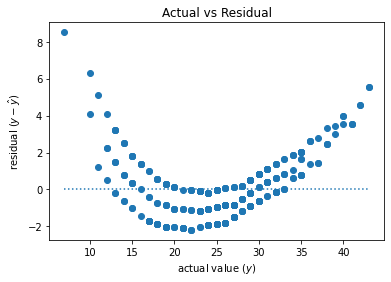

In [263]:
plot_residuals(residuals.y, residuals.yhat);

### 3.
In the next section of your notebook, perform the steps above with the `flyers` column as the model's only feature.
<div class="alert alert-box alert-info">
I performed OLS using Temperature in example 1. I will use the flyers column for example 3.</div>

>Does this model beat the baseline?
>
>Would you prefer the `rainfall`, `log_rainfall`, or the `temperature` model?

In [103]:
x = df_lemonade.Rainfall
y = df_lemonade.Sales

residuals = pd.DataFrame({'x': x,
                          'y': y})

In [104]:
residuals['baseline_residual'] = df_lemonade.baseline - df_lemonade.Sales

In [105]:
ols_model = ols('Sales ~ Flyers', data=df_lemonade).fit()

In [106]:
residuals['yhat'] = ols_model.predict(df_lemonade.Flyers)

In [107]:
residuals['ols_model_residuals'] = residuals.yhat - residuals.y

In [108]:
baseline_sse = (residuals.baseline_residual**2).sum()
model_sse = (residuals.ols_model_residuals**2).sum()

In [109]:
if model_sse < baseline_sse:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    # print(f"{baseline_sse/model_sse:.2f}")
    print("Let's evaluate the model with a few more tests.")
else:
    print("Return back to the workbench. This model does not outperform the baseline. \
          Remember, ask yourself if it's even worth it to build a model for your business problems.")

Our model beats the baseline!
SSE: 6083.33 < 17297.85
Let's evaluate the model with a few more tests.


### 4.
Which of these 4 single regression models would you want to move forward with?

### __Takeaways__
---
`Temperature` performs better at predicting Sales than any feature we've looked at. I will press forward with `Temperature`.

`log_rainfall` has the second lowest SSE: 952.33. I would build a model that combines `log_rainfall` and `Temperature` to test whether it increases prediction "accuracy/score"?

## Tips dataset

1. Load the `tips` dataset from pydataset or seaborn

In [110]:
df = data("tips")

2. Define your baseline for `tip`. Our goal will be to see if we can make a model that is better than baseline for predicting tips on `total_bill`.

In [111]:
x = df.total_bill
y = df.tip
baseline_model = df.tip.mean()
baseline_residuals = df.tip - baseline_model

residuals = pd.DataFrame({'x': x,
                          'y': y,
                          'baseline_model': baseline_model,
                          'baseline_residuals': baseline_residuals
                         })

3. Fit a linear regression model (ordinary least squares) and compute `yhat`, predictions of tip using `total_bill`.

In [112]:
model = ols('tip ~ total_bill', data=df).fit()
predictions = model.predict(df.total_bill)

In [113]:
residuals['yhat'] = predictions
residuals['model_residuals'] = residuals.yhat - residuals.y

1. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [114]:
# Model SSE, MSE, RMSE
model_sse = (residuals.model_residuals**2).sum()

mse = mean_squared_error(residuals.y, residuals.yhat)

rmse = sqrt(mse)

print("OLS Model")
print(f"SSE: {model_sse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

OLS Model
SSE: 252.79
MSE: 1.04
RMSE: 1.02


2. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [115]:
# Baseline SSE, MSE, RMSE
model_sse = (residuals.baseline_residuals**2).sum()

mse = mean_squared_error(residuals.y, residuals.baseline_residuals)

rmse = sqrt(mse)

print("Baseline Model")
print(f"SSE: {model_sse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Baseline Model
SSE: 465.21
MSE: 8.99
RMSE: 3.00


3. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [116]:
if model_sse < baseline_sse:
    print("Our model beats the baseline!")
    print(f"SSE: {model_sse:.2f} < {baseline_sse:.2f}")
    # print(f"{baseline_sse/model_sse:.2f}")
    print("Let's evaluate the model with a few more tests.")
else:
    print("Return back to the workbench. This model does not outperform the baseline. \
          Remember, ask yourself if it's even worth it to build a model for your business problems.")

Our model beats the baseline!
SSE: 465.21 < 17297.85
Let's evaluate the model with a few more tests.


4. What is the amount of variance explained in your model?

In [117]:
rsquared = model.rsquared
print(f"The amount of variance explained by the model: {rsquared:.3f}")

The amount of variance explained by the model: 0.457


5. Is your model significantly better than the baseline model?

In [118]:
alpha = .05
f_pval = model.f_pvalue

if f_pval < alpha:
    print("Yep, our lil' ols model is something special:")
    print(f"{f_pval:.2f} < {alpha}")
else:
    print("Back to the drawing board!")

Yep, our lil' ols model is something special:
0.00 < 0.05


6. Plot the residuals for the linear regression model that you made.

In [119]:
# Thank you Ryan for this wonderful function!
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

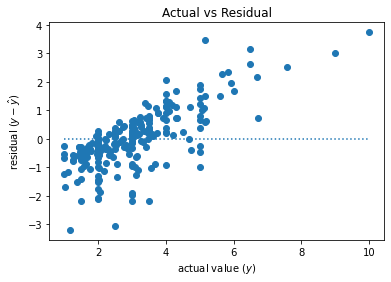

In [120]:
plot_residuals(residuals.y, residuals.yhat);

In [121]:
model_sse = (residuals.model_residuals**2).sum()

mse = mean_squared_error(residuals.y, residuals.yhat)

rmse = sqrt(mse)

print("OLS Model")
print(f"SSE: {model_sse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

OLS Model
SSE: 252.79
MSE: 1.04
RMSE: 1.02


#  OLS Models using scaled data

In [122]:
df_lemonade

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,baseline,log_rainfall
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,25.323288,0.693147
1,1/2/17,Monday,28.9,1.33,15,0.5,13,25.323288,0.285179
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,25.323288,0.285179
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,25.323288,0.048790
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,25.323288,0.000000
...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19,25.323288,0.000000
361,12/28/17,Thursday,37.8,1.25,32,0.5,16,25.323288,0.223144
362,12/29/17,Friday,39.5,1.25,17,0.5,15,25.323288,0.223144
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,25.323288,0.357674


In [221]:
columns_to_scale = ['Temperature', 'Flyers']
y = df_lemonade.Sales

In [222]:
df_numeric = np.log(df_lemonade[columns_to_scale])

In [223]:
df_scaled = pd.concat([df_numeric, y], axis=1)

In [224]:
df_scaled.rename(columns={'Temperature': 'temperature_scaled',
                          'Flyers' :'flyers_scaled'},
                 inplace=True)

In [225]:
df_scaled.head()

,temperature_scaled,flyers_scaled,Sales
0,3.295837,2.708050,10
1,3.363842,2.708050,13
2,3.540959,3.295837,15
3,3.786460,3.332205,17
4,3.747148,3.496508,18


In [226]:
model_1_scaled = ols('Sales ~ temperature_scaled', df_scaled).fit()

In [227]:
evaluations = pd.DataFrame({'x':df_scaled.temperature_scaled,
                            'y':df_scaled.Sales
                           })

In [228]:
evaluations['baseline_yhat'] = evaluations.y.mean()

In [229]:
evaluations['model_yhat'] = model_1_scaled.predict()

In [230]:
evaluations.head()

,x,y,baseline_yhat,model_yhat
0,3.295837,10,25.323288,7.819100
1,3.363842,13,25.323288,9.363330
2,3.540959,15,25.323288,13.385265
3,3.786460,17,25.323288,18.960014
4,3.747148,18,25.323288,18.067343


In [236]:
evaluations['baseline_residual'] = evaluations.baseline_yhat \
                                   - evaluations.y

In [237]:
evaluations.head()

,x,y,baseline_yhat,model_yhat,model_residual,baseline_residual
0,3.295837,10,25.323288,7.819100,-2.180900,15.323288
1,3.363842,13,25.323288,9.363330,-3.636670,12.323288
2,3.540959,15,25.323288,13.385265,-1.614735,10.323288
3,3.786460,17,25.323288,18.960014,1.960014,8.323288
4,3.747148,18,25.323288,18.067343,0.067343,7.323288


In [238]:
evaluations['model_residual'] = evaluations.model_yhat \
                                - evaluations.y

In [239]:
evaluations.head()

,x,y,baseline_yhat,model_yhat,model_residual,baseline_residual
0,3.295837,10,25.323288,7.819100,-2.180900,15.323288
1,3.363842,13,25.323288,9.363330,-3.636670,12.323288
2,3.540959,15,25.323288,13.385265,-1.614735,10.323288
3,3.786460,17,25.323288,18.960014,1.960014,8.323288
4,3.747148,18,25.323288,18.067343,0.067343,7.323288


In [244]:
# Baseline model - evaluation metrics
baseline_mse = mean_squared_error(evaluations.y,
                                  evaluations.baseline_yhat)
baseline_sse = baseline_mse * len(evaluations.baseline_yhat)
baseline_rmse = sqrt(baseline_mse)

In [246]:
# Model evaluation metrics
model_mse = mean_squared_error(evaluations.y,
                               evaluations.model_yhat)
model_sse = model_mse * len(evaluations.model_yhat)
model_rmse = sqrt(model_mse)

In [ ]:
print("Baseline Metrics")
print(f"Basline MSE{}")
print(f"Basline SSE{}")
print(f"Basline RMSE{}")